In [9]:
import numpy as np
import pandas as pd
import joblib

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.signal import hamming

import librosa
import os
import math
import numpy as np
import csv
from scipy.signal import find_peaks

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score

import cv2


def filtrare_liniste(path_fisiere, pathuri_fisiere_out_prag, praguri):
    for i in range(len(praguri)):
        for j in range(len(path_fisiere)):
            path_fisier = r'{}'.format(path_fisiere[j])
            y, sr = librosa.load(path_fisier, sr=8000, mono=True)

            clip = librosa.effects.trim(y, top_db=praguri[i])       #elimina semnalul cu o putere sub 10db, fiind considerat liniste

            path_fisier_out_prag = r'{}'.format(pathuri_fisiere_out_prag[i][j])
            
            sf.write(path_fisier_out_prag, clip[0], sr)          #se salveaza noul semnal audio
            

def spectograma(y, nr_onset, folder_out, sr=22050):
    if not folder_out in os.listdir(os.getcwd()):
        os.mkdir(folder_spectograme)
    path = os.getcwd()
    path_folder_out = os.path.join(path, folder_out)                    # se afla in proiect
    fisier_out = 'onset' +str(nr_onset) + '.jpg'                       # splitext ia numele fisierului fara extensie
    path_fisier_out = os.path.join(path_folder_out, fisier_out)         # calea fisierului de out

    plt.interactive(False)
    fig = plt.figure(figsize=[0.72, 0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

    fig.savefig(path_fisier_out, dpi=400, bbox_inches='tight', pad_inches=0)

    plt.close(fig)
    

def spectograme_onseturi(fisier_wav, folder_spectograme):
    y, sr = librosa.load(fisier_wav)
    print(sr)  #rata de esnationare
    print(len(y))  #y = duratata semnal in secunde * rata de esantionare sr
    #durata = len(y)/sr
    
    y = librosa.effects.trim(y, top_db=11)[0]       #elimina semnalul cu o putere sub 11db, fiind considerat liniste
    
    plt.figure(figsize=(14,5))
    librosa.display.waveshow(y, sr=sr)

    o_env = librosa.onset.onset_strength(y=y, sr=sr)
    times = librosa.times_like(o_env, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    print(onset_frames) # frame numbers of estimated onsets

    onset_times = librosa.frames_to_time(onset_frames)
    print(onset_times)

    y_db = 10.0 * np.log10(y)

    plt.figure(figsize=(10,5))
    librosa.display.waveshow(y, sr=sr)
    plt.vlines(onset_times, -0.3, 0.3, color = 'r')
    
    #Esantionare semnal
    fereastra = int(30*1e-3*sr)
    print(fereastra)

    #Ferestre suprapuse
    p=0.2  #Factorul de suprapunere

    #Numarul de cadre suprarpuse
    numar_cadre_p = int(len(y)/(fereastra*(1-p)))
    print("Numarul de cadre este %d" %numar_cadre_p)

    #Creare variabila timp pentru axa Ox
    time_axis = np.arange(0, fereastra)*1/sr #utilizata la plot-uri
    
    
    # cadre onset

    durata = len(y) / sr
    timpi = np.arange(0, durata, 1/sr)
    dictionar = {}
    nr_esantion = [i for i in range(1, len(y) + 1)]
    for i in range(len(nr_esantion)):
        dictionar[nr_esantion[i]] = timpi[i]

    cadre = []
    for i in range(len(onset_times)):
        onset1 = onset_times[i]
        try:
            onset2 = onset_times[i+1]
        except IndexError:
            onset2 = timpi[-1]
        cadru_curent = []
        for j in range(len(y)):
            if j in dictionar:
                if dictionar[j] > onset1: 
                    if dictionar[j] < onset2:
                        cadru_curent.append(j)
                    else:
                        break
        cadre.append(cadru_curent)

    # fiecare onset are o lista de esantioane
    esantioane_onset = []
    for i in range(len(cadre)):
        esantioane_onset.append(y[cadre[i][0] : cadre[i][-1]])

    # note aferente fiecarui onset  
    note = []
    frecvente = []
    for i in range(len(esantioane_onset)):
        spectograma(esantioane_onset[i], i, folder_spectograme)

22050
383260
[  3  13  25  37  48  61  72  85  97 107 119 131 147 164 190 203 214 225
 235 247 258 269 281 292 303 314 330 346 383 396 407 418 429 441 452 462
 472 482 492 507 522 544 556 566 576 588 599 610 621 632 643 654 681 702
 722]
[ 0.06965986  0.30185941  0.58049887  0.85913832  1.11455782  1.41641723
  1.67183673  1.97369615  2.2523356   2.48453515  2.7631746   3.04181406
  3.41333333  3.80807256  4.41179138  4.71365079  4.96907029  5.2244898
  5.45668934  5.7353288   5.9907483   6.2461678   6.52480726  6.78022676
  7.03564626  7.29106576  7.66258503  8.03410431  8.89324263  9.19510204
  9.45052154  9.70594104  9.96136054 10.24       10.4954195  10.72761905
 10.95981859 11.19201814 11.42421769 11.77251701 12.12081633 12.63165533
 12.91029478 13.14249433 13.37469388 13.65333333 13.90875283 14.16417234
 14.41959184 14.67501134 14.93043084 15.18585034 15.81278912 16.30040816
 16.76480726]


C:\Users\bogdan1.bratu\AppData\Local\Temp\ipykernel_12356\134924271.py:80: RuntimeWarning: invalid value encountered in log10
  y_db = 10.0 * np.log10(y)


661
Numarul de cadre este 713


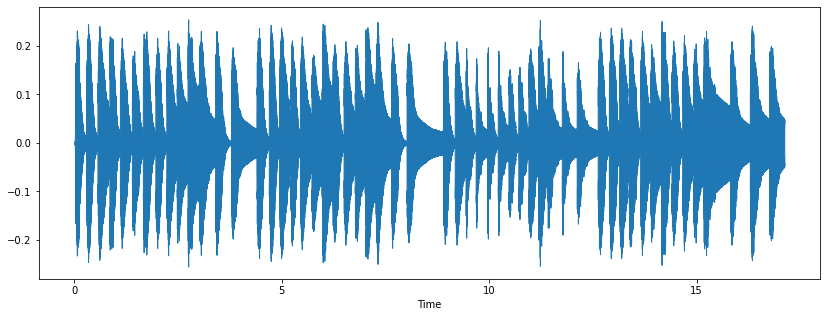

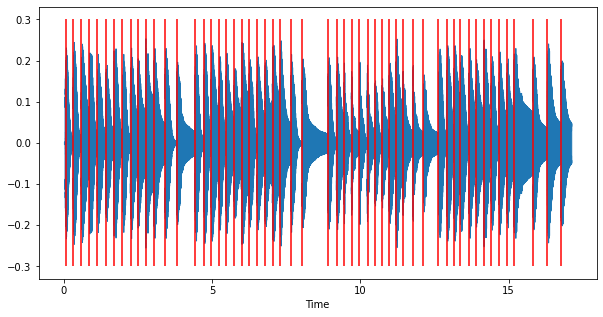

In [10]:
fisier_wav = 'whistle3.wav'
folder_spectograme_semnal = 'whistle3_spectograme'
folder_spectograme = 'spectograme_trainsitest_filtrate_prag11db'
# 
spectograme_onseturi(fisier_wav, folder_spectograme_semnal)         # folder cu spectograme rezultat
# 

In [11]:
# spectograme individual
path_folder = os.path.join(os.getcwd(), folder_spectograme)
fisiere = os.listdir(path_folder)
path_fisiere = [os.path.join(path_folder, i) for i in fisiere]

imagini = [cv2.imread(i) for i in path_fisiere]
imagini = np.array(imagini)
dim = len(imagini[0]) * len(imagini[0][0]) * 3
imagini = imagini.reshape((imagini.shape[0]), dim)

# spectograme semnal
path_folder_semnal = os.path.join(os.getcwd(), folder_spectograme_semnal)
fisiere_semnal = os.listdir(path_folder_semnal)
path_fisiere_semnal = [os.path.join(path_folder_semnal, i) for i in fisiere_semnal]

imagini_semnal = [cv2.imread(i) for i in path_fisiere_semnal]
imagini_semnal = np.array(imagini_semnal)
dim_semnal = len(imagini_semnal[0]) * len(imagini_semnal[0][0]) * 3
imagini_semnal = imagini_semnal.reshape((imagini_semnal.shape[0]), dim_semnal)


# dim_nou = len(imagini[0]) * len(imagini_semnal[0][0]) * 3
# imagini = imagini.reshape((imagini.shape[0]), dim_semnal)

# adaugare imagini semnal la imagini
index_imagini_semnal = imagini.shape[0]
imagini = np.append(imagini, imagini_semnal, axis=0)

X = imagini
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)           
clustere = kmeans.fit_predict(X)

C:\Users\bogdan1.bratu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\bogdan1.bratu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


In [12]:
imagini = imagini.reshape((imagini.shape[0]), dim_semnal)

In [13]:
dim_semnal

145173

In [14]:
imagini.shape

(448, 145173)

In [15]:
clustere

array([22, 22, 22, 14, 14, 22, 22, 22, 22, 22,  8,  8,  8, 21, 21, 21,  8,
       21,  8,  8, 28, 28, 28, 28, 28, 28, 18, 18, 15, 28, 15, 15, 21,  8,
        8, 21, 21, 21,  8,  8,  8, 21, 15, 15, 28, 28, 28, 28, 28, 28, 18,
       28, 18, 18,  8, 21, 21, 21, 21, 11,  8,  8,  8,  8, 31, 31, 31, 14,
       31, 31, 31, 31, 31, 31, 28, 28, 28, 28, 18, 28, 18, 18, 28, 15, 15,
       18, 28, 28, 28,  1, 18, 18, 18, 18, 18, 25,  9, 25, 25, 25, 25, 25,
       25, 25, 25, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 16, 16, 16, 14,
       14, 16, 16, 16, 16, 16,  0,  0, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 36, 36, 34, 34, 34,  1, 34, 34, 34, 34, 34, 34,  1,  1, 29,  1,
        1,  1, 29,  1, 29,  1,  1,  1,  1,  1,  1,  1,  1, 29, 15,  1, 32,
       32, 32, 14, 14, 32, 32, 14, 32, 32, 17,  9, 17, 17, 14, 17, 17, 17,
       17, 17, 10, 10, 10, 28, 10, 10, 10, 10, 10, 10,  0,  0, 35, 35, 35,
       21, 21, 35, 35, 35, 35, 35,  0,  0, 10, 10, 10,  1, 10, 10, 10, 10,
       10, 10, 33, 33, 33

In [16]:
y = [fisiere[i][:3] if fisiere[i][2] == "#" else fisiere[i][:2] for i in range(len(fisiere))]
le = LabelEncoder()
y_et = le.fit_transform(y)

dictionar = {}
clustere_unice = np.unique(clustere)
clustere_fara_clustere_semnal = clustere[:index_imagini_semnal]
for i in range(len(clustere_unice)):
    masca = np.where(clustere_fara_clustere_semnal == i, 1, 0)
    aparitii_etichete = np.bincount(y_et[masca==1])
    eticheta_aleasa = aparitii_etichete.argmax()
    dictionar[i] = eticheta_aleasa
    
dictionar

ValueError: attempt to get argmax of an empty sequence

In [ ]:
clustere_semnal = clustere[index_frecvente_semnal:]
clustere_semnal

In [ ]:
clustere_semnal_clase = np.random.rand(len(clustere_semnal))
for i in range(len(clustere_semnal)):
    clustere_semnal_clase[i] = dictionar[clustere_semnal[i]]

clustere_semnal_clase

In [ ]:
clustere_semnal_clase = np.array([int(i) for i in clustere_semnal_clase])
clustere_semnal_clase_inv = le.inverse_transform(clustere_semnal_clase)
clustere_semnal_clase_inv.tolist()
predictii = clustere_semnal_clase_inv

In [ ]:
from music21 import *

note_prezise = predictii

note_corecte = ['B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','C4','D4','D4','B3','B3','B3','C4','C4','A3',
                      'G3','C4','C4','A3','G3','C4','D4','D4','C4','C4','A4','A4','G4','G4','E4','E4','D4','C4','E4','G4',
                      'E4','B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','D4','B3','C4']


s = stream.Stream()
for i, j in zip(note_prezise, note_corecte):
        if i[0] != j[0]:
            n = note.Note(i[0], quarterLength = 1)
            n.style.color='red'
            s.append([n])
        else:
            n = note.Note(i[0], quarterLength = 1)
            s.append([n])
    
s.show()